<a href="https://colab.research.google.com/github/lukigu/real-estate-prediction/blob/main/Lukasz_Guzy_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import json
import datetime
import math
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

from google.colab import files
uploaded = files.upload()

Saving test___warszawa.csv to test___warszawa.csv


In [ ]:
fed_files = ['test___warszawa.csv']

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [ ]:
dfs[0]

,Liczba nowych mieszkań,L. ludności na 1m2,Liczba urodzeń,Liczba zgonów,Inflacja,Średnie zarobki brutto,PKB billion dolarów,Liczba ludności warszawy,srednia cena
Rok,,,,,,,,,
2010-01-01,12462,3287,19680,17668,102.4,4694.47,479.83,1720398,481336
2011-01-01,9356,3303,18863,17586,103.7,4936.36,528.30,1700612,470216
2012-01-01,13496,3317,18795,18460,103.5,5077.53,498.52,1715517,467606
2013-01-01,13128,3334,18438,18722,100.8,5226.05,521.02,1724404,433957
2014-01-01,14964,3355,19511,17959,100.8,5385.80,542.48,1735442,451306
2015-01-01,13306,3372,19905,18592,99.1,5591.46,477.81,1744351,434152
2016-01-01,20119,3391,20980,18512,99.5,5739.61,472.63,1753977,432812
2017-01-01,20331,3412,21315,19118,101.9,6059.04,526.51,1764615,453971
2018-01-01,23430,3437,21276,19673,101.6,6432.78,597.41,1777972,498214


In [ ]:
price_data = dfs[0]

In [ ]:
price_data["adj_cena"] = price_data["srednia cena"] / price_data["Inflacja"] * 100

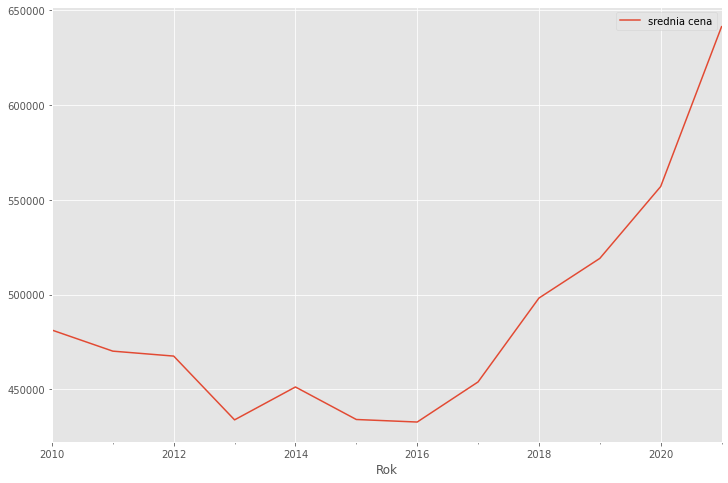

In [ ]:
price_data.plot.line(y="srednia cena", use_index=True)

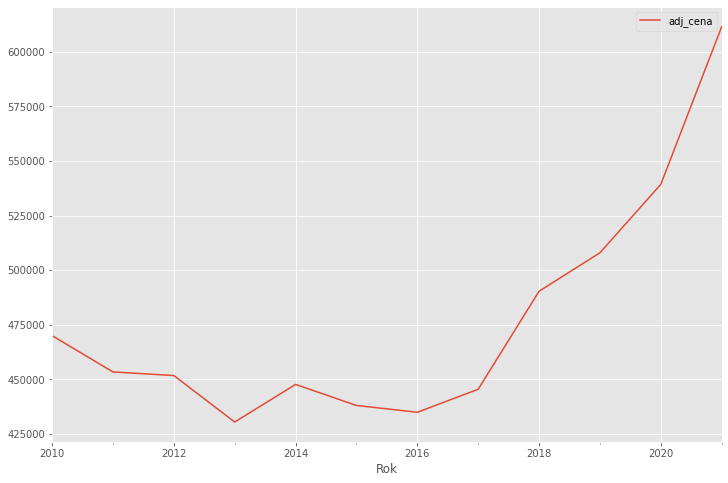

In [ ]:
price_data.plot.line(y="adj_cena", use_index=True)

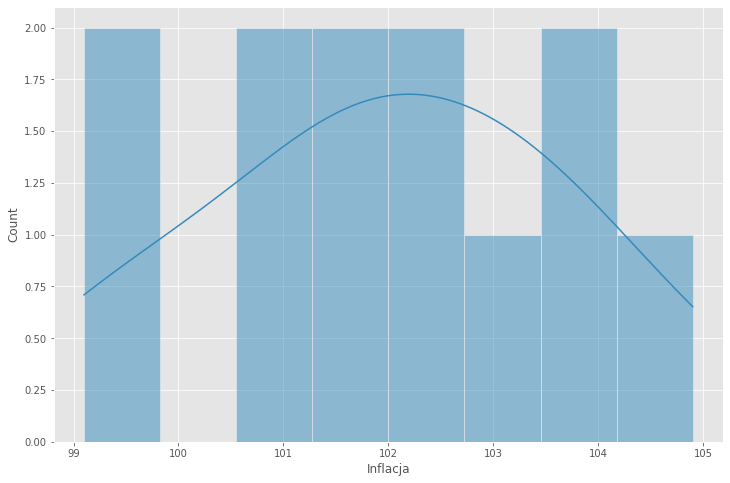

In [ ]:
ride_sharing = pd.read_csv("test___warszawa.csv") 
# Preview the first 5 lines of the loaded data 
ride_sharing.head()
df_numeric = ride_sharing.select_dtypes(include='number')
df_numeric
sns.histplot(df_numeric['Inflacja'], bins=8, kde=True)

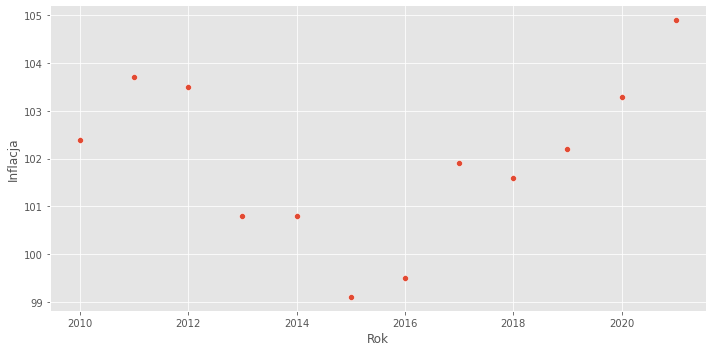

In [ ]:
sns.relplot(x = 'Rok', y='Inflacja', data=ride_sharing, aspect=2.0)

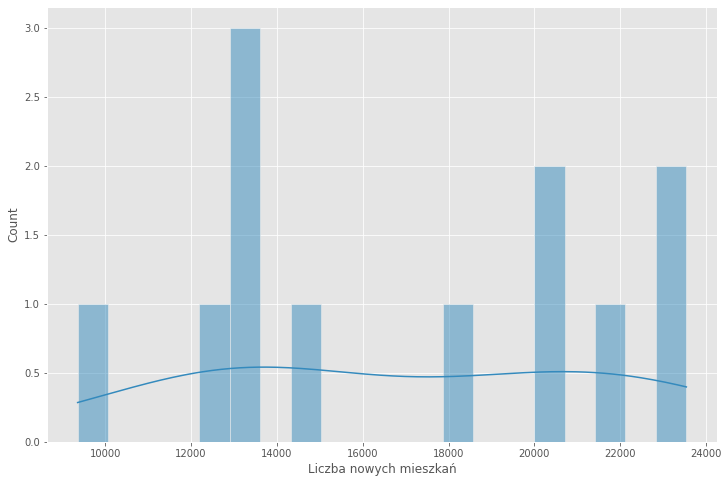

In [ ]:
df_numeric = ride_sharing.select_dtypes(include='number')
df_numeric
sns.histplot(df_numeric['Liczba nowych mieszkań'], bins=20, kde=True)

In [ ]:
price_data["next_quarter"] = price_data["adj_cena"].shift(-2)

In [ ]:
price_data

,Liczba nowych mieszkań,L. ludności na 1m2,Liczba urodzeń,Liczba zgonów,Inflacja,Średnie zarobki brutto,PKB billion dolarów,Liczba ludności warszawy,srednia cena,adj_cena,next_quarter
Rok,,,,,,,,,,,
2010-01-01,12462,3287,19680,17668,102.4,4694.47,479.83,1720398,481336,470054.687500,451793.236715
2011-01-01,9356,3303,18863,17586,103.7,4936.36,528.30,1700612,470216,453438.765670,430512.896825
2012-01-01,13496,3317,18795,18460,103.5,5077.53,498.52,1715517,467606,451793.236715,447724.206349
2013-01-01,13128,3334,18438,18722,100.8,5226.05,521.02,1724404,433957,430512.896825,438094.853683
2014-01-01,14964,3355,19511,17959,100.8,5385.80,542.48,1735442,451306,447724.206349,434986.934673
2015-01-01,13306,3372,19905,18592,99.1,5591.46,477.81,1744351,434152,438094.853683,445506.378803
2016-01-01,20119,3391,20980,18512,99.5,5739.61,472.63,1753977,432812,434986.934673,490368.110236
2017-01-01,20331,3412,21315,19118,101.9,6059.04,526.51,1764615,453971,445506.378803,507977.495108
2018-01-01,23430,3437,21276,19673,101.6,6432.78,597.41,1777972,498214,490368.110236,539285.575992


In [ ]:
price_data.dropna(inplace=True)

In [ ]:
price_data

,Liczba nowych mieszkań,L. ludności na 1m2,Liczba urodzeń,Liczba zgonów,Inflacja,Średnie zarobki brutto,PKB billion dolarów,Liczba ludności warszawy,srednia cena,adj_cena,next_quarter
Rok,,,,,,,,,,,
2010-01-01,12462,3287,19680,17668,102.4,4694.47,479.83,1720398,481336,470054.687500,451793.236715
2011-01-01,9356,3303,18863,17586,103.7,4936.36,528.30,1700612,470216,453438.765670,430512.896825
2012-01-01,13496,3317,18795,18460,103.5,5077.53,498.52,1715517,467606,451793.236715,447724.206349
2013-01-01,13128,3334,18438,18722,100.8,5226.05,521.02,1724404,433957,430512.896825,438094.853683
2014-01-01,14964,3355,19511,17959,100.8,5385.80,542.48,1735442,451306,447724.206349,434986.934673
2015-01-01,13306,3372,19905,18592,99.1,5591.46,477.81,1744351,434152,438094.853683,445506.378803
2016-01-01,20119,3391,20980,18512,99.5,5739.61,472.63,1753977,432812,434986.934673,490368.110236
2017-01-01,20331,3412,21315,19118,101.9,6059.04,526.51,1764615,453971,445506.378803,507977.495108
2018-01-01,23430,3437,21276,19673,101.6,6432.78,597.41,1777972,498214,490368.110236,539285.575992


In [ ]:
price_data["change"] = (price_data["next_quarter"] > price_data["adj_cena"]).astype(int)

In [ ]:
price_data

,Liczba nowych mieszkań,L. ludności na 1m2,Liczba urodzeń,Liczba zgonów,Inflacja,Średnie zarobki brutto,PKB billion dolarów,Liczba ludności warszawy,srednia cena,adj_cena,next_quarter,change
Rok,,,,,,,,,,,,
2010-01-01,12462,3287,19680,17668,102.4,4694.47,479.83,1720398,481336,470054.687500,451793.236715,0
2011-01-01,9356,3303,18863,17586,103.7,4936.36,528.30,1700612,470216,453438.765670,430512.896825,0
2012-01-01,13496,3317,18795,18460,103.5,5077.53,498.52,1715517,467606,451793.236715,447724.206349,0
2013-01-01,13128,3334,18438,18722,100.8,5226.05,521.02,1724404,433957,430512.896825,438094.853683,1
2014-01-01,14964,3355,19511,17959,100.8,5385.80,542.48,1735442,451306,447724.206349,434986.934673,0
2015-01-01,13306,3372,19905,18592,99.1,5591.46,477.81,1744351,434152,438094.853683,445506.378803,1
2016-01-01,20119,3391,20980,18512,99.5,5739.61,472.63,1753977,432812,434986.934673,490368.110236,1
2017-01-01,20331,3412,21315,19118,101.9,6059.04,526.51,1764615,453971,445506.378803,507977.495108,1
2018-01-01,23430,3437,21276,19673,101.6,6432.78,597.41,1777972,498214,490368.110236,539285.575992,1


In [ ]:
price_data["change"].value_counts()

1    6
0    4
Name: change, dtype: int64

In [ ]:
predictors = ['Liczba nowych mieszkań', 'L. ludności na 1m2', 'Liczba urodzeń',
       'Liczba zgonów', 'Średnie zarobki brutto',
       'PKB billion dolarów', 'Liczba ludności warszawy','adj_cena']
target = "change"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

START = 4
STEP = 1

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=5, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [ ]:
preds, accuracy = backtest(price_data, predictors, target)

In [ ]:
preds

array([0, 0, 0, 1, 1, 1])

In [ ]:
accuracy

0.6666666666666666

In [ ]:
yearly = price_data.rolling(5, min_periods=1).mean()

In [ ]:
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [ ]:
price_data

,Liczba nowych mieszkań,L. ludności na 1m2,Liczba urodzeń,Liczba zgonów,Inflacja,Średnie zarobki brutto,PKB billion dolarów,Liczba ludności warszawy,srednia cena,adj_cena,next_quarter,change,Liczba nowych mieszkań_year,L. ludności na 1m2_year,Liczba urodzeń_year,Liczba zgonów_year,Średnie zarobki brutto_year,PKB billion dolarów_year,Liczba ludności warszawy_year,adj_cena_year
Rok,,,,,,,,,,,,,,,,,,,,
2010-01-01,12462,3287,19680,17668,102.4,4694.47,479.83,1720398,481336,470054.687500,451793.236715,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2011-01-01,9356,3303,18863,17586,103.7,4936.36,528.30,1700612,470216,453438.765670,430512.896825,0,0.857640,1.002428,0.978803,0.997674,1.025116,1.048079,0.994216,0.982008
2012-01-01,13496,3317,18795,18460,103.5,5077.53,498.52,1715517,467606,451793.236715,447724.206349,0,1.146514,1.004441,0.983379,1.031016,1.035642,0.992639,1.001952,0.985525
2013-01-01,13128,3334,18438,18722,100.8,5226.05,521.02,1724404,433957,430512.896825,438094.853683,1,1.084018,1.007175,0.973290,1.033851,1.048649,1.027820,1.005347,0.953623
2014-01-01,14964,3355,19511,17959,100.8,5385.80,542.48,1735442,451306,447724.206349,434986.934673,0,1.180015,1.010786,1.023802,0.993362,1.063538,1.055347,1.009404,0.993387
2015-01-01,13306,3372,19905,18592,99.1,5591.46,477.81,1744351,434152,438094.853683,445506.378803,1,1.035486,1.010731,1.042016,1.017970,1.066372,0.930268,1.011766,0.986005
2016-01-01,20119,3391,20980,18512,99.5,5739.61,472.63,1753977,432812,434986.934673,490368.110236,1,1.341034,1.011092,1.074476,1.003415,1.062086,0.940572,1.011090,0.987210
2017-01-01,20331,3412,21315,19118,101.9,6059.04,526.51,1764615,453971,445506.378803,507977.495108,1,1.241997,1.011622,1.064164,1.028923,1.081896,1.036253,1.011497,1.013978
2018-01-01,23430,3437,21276,19673,101.6,6432.78,597.41,1777972,498214,490368.110236,539285.575992,1,1.271297,1.012848,1.032946,1.048064,1.101176,1.141472,1.012933,1.086481


In [ ]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [ ]:
accuracy

0.6666666666666666

In [ ]:
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

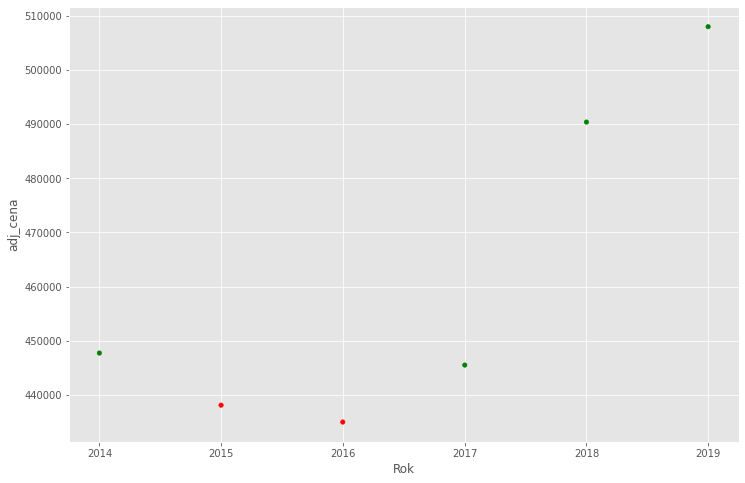

In [ ]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="Rok", y="adj_cena", color=pred_match)

In [ ]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=5, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=5, random_state=1)

In [ ]:
result["importances_mean"]

array([0.  , 0.  , 0.04, 0.1 , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
predictors

['Liczba nowych mieszkań',
 'L. ludności na 1m2',
 'Liczba urodzeń',
 'Liczba zgonów',
 'Średnie zarobki brutto',
 'PKB billion dolarów',
 'Liczba ludności warszawy',
 'adj_cena']